In [37]:
# import necessary libraries:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, QuantileTransformer, Normalizer
from sklearn.preprocessing import power_transform

from models.prepareData import convertData
from models.models import linearRegressionModel, polynomialRegression

In [38]:
df_data = pd.read_csv('data_thesis/data_2.csv', skipfooter=1, engine='python')

In [39]:
# select specific cols:
df_data = df_data[['transaction_type', 'property_type', 'price', 'area', 'addr_street', 'addr_ward', 'addr_district', 'addr_city', 'created_date']]

# select specific area:
# df_data = df_data[
#                 (df_data['transaction_type'] == 'bán') &
#                 (df_data['property_type'] == 'căn hộ chung cư') &
#                 (df_data['area'] > 0) &
#                 (df_data['price'] > 0) &
#                 (df_data['addr_street'] == 'đường nguyễn hữu thọ') &
#                 (df_data['addr_ward'] == 'xã phước kiển') &
#                 (df_data['addr_district'] == 'nhà bè') &
#                 (df_data['addr_city'] == 'hồ chí minh')
#                 ]
# df_data = df_data[
#                 (df_data['transaction_type'] == 'bán') &
#                 (df_data['property_type'] == 'căn hộ chung cư') &
#                 (df_data['area'] > 0) &
#                 (df_data['price'] > 0) &
#                 (df_data['addr_street'] == 'đường nguyễn hữu cảnh') &
#                 (df_data['addr_ward'] == 'phường 22') &
#                 (df_data['addr_district'] == 'bình thạnh') &
#                 (df_data['addr_city'] == 'hồ chí minh')
#                 ]
# df_data = df_data[
#                 (df_data['transaction_type'] == 'bán') &
#                 (df_data['property_type'] == 'nhà riêng') &
#                 (df_data['area'] > 0) &
#                 (df_data['price'] > 0) &
#                 (df_data['addr_street'] == 'đường minh khai') &
#                 (df_data['addr_ward'] == 'phường minh khai') &
#                 (df_data['addr_district'] == 'hai bà trưng') &
#                 (df_data['addr_city'] == 'hà nội')
#                 ]
# df_data = df_data[
#                 (df_data['transaction_type'] == 'bán') &
#                 (df_data['property_type'] == 'nhà riêng') &
#                 (df_data['area'] > 0) &
#                 (df_data['price'] > 0) &
#                 (df_data['addr_street'] == 'đường mỹ đình') &
#                 (df_data['addr_ward'] == 'phường mỹ đình 1') &
#                 (df_data['addr_district'] == 'nam từ liêm') &
#                 (df_data['addr_city'] == 'hà nội')
#                 ]
df_data = df_data[
                (df_data['transaction_type'] == 'bán') &
                (df_data['property_type'] == 'căn hộ chung cư') &
                (df_data['area'] > 0) &
                (df_data['price'] > 0) &
                (df_data['addr_street'] == 'đường minh khai') &
                (df_data['addr_ward'] == 'phường vĩnh tuy') &
                (df_data['addr_district'] == 'hai bà trưng') &
                (df_data['addr_city'] == 'hà nội')
                ]

In [40]:
df_data

,transaction_type,property_type,price,area,addr_street,addr_ward,addr_district,addr_city,created_date
142164,bán,căn hộ chung cư,24.000000,73.0,đường minh khai,phường vĩnh tuy,hai bà trưng,hà nội,2020-10-17
146601,bán,căn hộ chung cư,25.000000,200.0,đường minh khai,phường vĩnh tuy,hai bà trưng,hà nội,2020-11-02
148789,bán,căn hộ chung cư,25.925926,108.0,đường minh khai,phường vĩnh tuy,hai bà trưng,hà nội,2019-12-18
148967,bán,căn hộ chung cư,26.000000,50.0,đường minh khai,phường vĩnh tuy,hai bà trưng,hà nội,2019-10-19
149099,bán,căn hộ chung cư,26.000000,73.0,đường minh khai,phường vĩnh tuy,hai bà trưng,hà nội,2020-10-12
...,...,...,...,...,...,...,...,...,...
225096,bán,căn hộ chung cư,56.521739,230.0,đường minh khai,phường vĩnh tuy,hai bà trưng,hà nội,2020-11-04
226287,bán,căn hộ chung cư,57.333333,150.0,đường minh khai,phường vĩnh tuy,hai bà trưng,hà nội,2020-10-17
226579,bán,căn hộ chung cư,57.522124,226.0,đường minh khai,phường vĩnh tuy,hai bà trưng,hà nội,2020-11-04
228348,bán,căn hộ chung cư,58.695652,230.0,đường minh khai,phường vĩnh tuy,hai bà trưng,hà nội,2020-10-23


In [41]:
# check if data is null:
df_data.isnull()

,transaction_type,property_type,price,area,addr_street,addr_ward,addr_district,addr_city,created_date
142164,False,False,False,False,False,False,False,False,False
146601,False,False,False,False,False,False,False,False,False
148789,False,False,False,False,False,False,False,False,False
148967,False,False,False,False,False,False,False,False,False
149099,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
225096,False,False,False,False,False,False,False,False,False
226287,False,False,False,False,False,False,False,False,False
226579,False,False,False,False,False,False,False,False,False
228348,False,False,False,False,False,False,False,False,False


In [42]:
# drop null values:
df_data = df_data.dropna()

In [43]:
# sort values by created date
df_data = df_data.sort_values(by=['created_date'])

In [44]:
# Drop duplicates:    
df_data = df_data.drop_duplicates(subset='area', keep='last', inplace=False)

In [45]:
# data after preprocessing:
df_data

,transaction_type,property_type,price,area,addr_street,addr_ward,addr_district,addr_city,created_date
193054,bán,căn hộ chung cư,40.000000,60.00,đường minh khai,phường vĩnh tuy,hai bà trưng,hà nội,2019-05-29
188529,bán,căn hộ chung cư,38.097740,76.12,đường minh khai,phường vĩnh tuy,hai bà trưng,hà nội,2019-05-30
177827,bán,căn hộ chung cư,34.574468,94.00,đường minh khai,phường vĩnh tuy,hai bà trưng,hà nội,2019-10-04
285058,bán,căn hộ chung cư,93.333333,45.00,đường minh khai,phường vĩnh tuy,hai bà trưng,hà nội,2020-06-25
194553,bán,căn hộ chung cư,40.262172,53.40,đường minh khai,phường vĩnh tuy,hai bà trưng,hà nội,2020-09-28
...,...,...,...,...,...,...,...,...,...
204526,bán,căn hộ chung cư,44.897959,98.00,đường minh khai,phường vĩnh tuy,hai bà trưng,hà nội,2020-11-07
181742,bán,căn hộ chung cư,35.789474,95.00,đường minh khai,phường vĩnh tuy,hai bà trưng,hà nội,2020-11-07
180150,bán,căn hộ chung cư,35.185185,54.00,đường minh khai,phường vĩnh tuy,hai bà trưng,hà nội,2020-11-07
191304,bán,căn hộ chung cư,39.236479,94.30,đường minh khai,phường vĩnh tuy,hai bà trưng,hà nội,2020-11-07


In [46]:
# scale data:
# df_data['area'] = (df_data['area']+1).transform(np.log)
# df_data['price'] = (df_data['price']+1).transform(np.log)

In [47]:
# print("Data after using log transformation")
# df_data

In [48]:
# divide train - test:
train, test = train_test_split(df_data, test_size=0.2)

In [49]:
# Sort data by area column:
train = train.sort_values(by=['area'])
test = test.sort_values(by=['area'])

In [50]:
X_train, Y_train = convertData(train)
X_test, Y_test = convertData(test)

In [51]:
X_train

array([[ 45.  ],
       [ 51.  ],
       [ 53.  ],
       [ 53.4 ],
       [ 55.  ],
       [ 56.  ],
       [ 57.  ],
       [ 57.9 ],
       [ 58.9 ],
       [ 59.  ],
       [ 65.  ],
       [ 67.3 ],
       [ 68.  ],
       [ 69.6 ],
       [ 70.  ],
       [ 71.  ],
       [ 72.  ],
       [ 72.2 ],
       [ 73.  ],
       [ 73.2 ],
       [ 73.38],
       [ 74.  ],
       [ 75.  ],
       [ 75.2 ],
       [ 75.5 ],
       [ 76.  ],
       [ 76.12],
       [ 77.  ],
       [ 77.06],
       [ 78.  ],
       [ 79.  ],
       [ 79.2 ],
       [ 80.  ],
       [ 80.1 ],
       [ 81.  ],
       [ 81.19],
       [ 81.3 ],
       [ 82.  ],
       [ 83.  ],
       [ 85.6 ],
       [ 86.  ],
       [ 87.  ],
       [ 87.9 ],
       [ 88.  ],
       [ 90.  ],
       [ 90.37],
       [ 92.  ],
       [ 93.4 ],
       [ 94.  ],
       [ 94.3 ],
       [ 95.2 ],
       [ 97.5 ],
       [ 97.98],
       [ 98.  ],
       [100.  ],
       [101.  ],
       [103.  ],
       [104.  ],
       [105.  

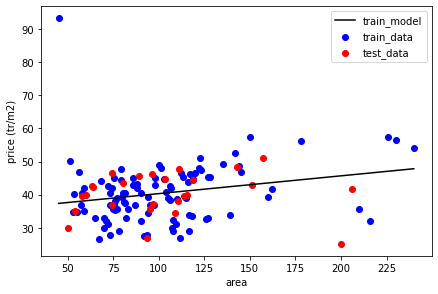

Linear model coefficient: [[0.05357259]]
Linear model intercept: [34.96917314]
Linear model RMSE: 8.691418501487618


In [52]:
# find model by using linear regression:
model, linear_rmse = linearRegressionModel(X_train, Y_train)

# find Y by using linear model predict:
Y_train_pred = model.predict(X_train)
# Y_test_pred = model.predict(X_test)

# Plot linear model:
plt.scatter(X_train, Y_train, marker='o', color='blue', label='train_data')
plt.scatter(X_test, Y_test, marker='o', color='red', label='test_data')
plt.plot(X_train, Y_train_pred, color='black', label='train_model')
# plt.plot(X_test, Y_test_pred, color='purple', label='test_model')
plt.legend()
plt.tight_layout()
plt.xlabel('area')
plt.ylabel('price (tr/m2)')
plt.show()

# Linear Model coefficient and intercept:
print("Linear model coefficient: {}".format(model.coef_))
print("Linear model intercept: {}".format(model.intercept_))

# linear_model rmse:
print("Linear model RMSE: {}".format(linear_rmse))

Polynomial Regression with degree = 6


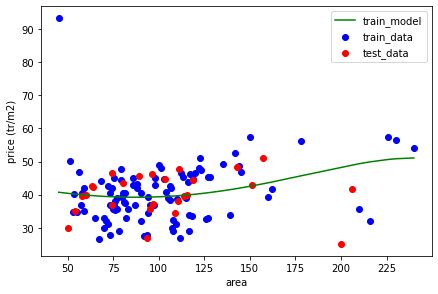

Polynomial model coefficient: [[ 0.00000000e+00 -1.23647734e-01  4.93026161e-04  1.72046472e-06
   1.21086175e-09 -1.21791326e-11 -5.69967992e-14]]
Polynomial model intercept: [45.14154245]
Polynomial Model RMSE: 8.493493412213967


In [53]:
poly_model, poly_rmse, degree = polynomialRegression(X_train, Y_train)
print("Polynomial Regression with degree = {}".format(degree))

# transform X and X_test:
polynomial_features = PolynomialFeatures(degree=degree)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.fit_transform(X_test)

# Try predicting Y
Y_train_poly_pred = poly_model.predict(X_train_poly)
# Y_test_poly_pred = poly_model.predict(X_test_poly)

# Plot model:
plt.scatter(X_train, Y_train, marker='o', color='blue', label='train_data')
plt.scatter(X_test, Y_test, marker='o', color='red', label='test_data')
plt.plot(X_train, Y_train_poly_pred, color='green', label='train_model')
# plt.plot(X_test, Y_test_poly_pred, color='purple', label='test_model')
plt.legend()
plt.tight_layout()
plt.xlabel('area')
plt.ylabel('price (tr/m2)')
plt.show()

# Polynomial Model coefficient and intercept:
print("Polynomial model coefficient: {}".format(poly_model.coef_))
print("Polynomial model intercept: {}".format(poly_model.intercept_))

# poly_model rmse:
print("Polynomial Model RMSE: {}".format(poly_rmse))

In [54]:
# score the model with test data:

# Linear score:
print("\n\n")
print("Linear Model score on train dataset: ", model.score(X_train, Y_train))
print("Linear Model score on test dataset: ", model.score(X_test, Y_test))

# Poly score:
print("\n")
print("Poly Model score on train dataset: ", poly_model.score(X_train_poly, Y_train))
print("Poly Model score on test dataset: ", poly_model.score(X_test_poly, Y_test))




Linear Model score on train dataset:  0.05398957699485163
Linear Model score on test dataset:  -0.08559718995192878


Poly Model score on train dataset:  0.0965849824866637
Poly Model score on test dataset:  -0.2817430991662766


Keyword: Heteroscedasticity, Homoscedasticity